<a href="https://colab.research.google.com/github/DeekshithaGona/IRIS_DATA/blob/main/EDA_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The Iris data set is best known database to be found in the pattern recognition literature. Before moving to machine learning for pattern learning, we will perform EDA and visualize the data set.The data set consists of 150 observations with 4 features - Sepal length, Sepal width, Petal length and Petal width, of three different species - Setosa, Versicolar and Virginica.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

%matplotlib inline

iris = pd.read_csv('/content/drive/MyDrive/iris.csv')
iris.shape


(150, 5)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Visual Exploratory Data Analysis
####By displaying a variable in each axis, we can detect if a relationship or correlation between the two variables exists. Scatter Plots are also great for observing the spread of the data as they retain the exact data values and sample size.

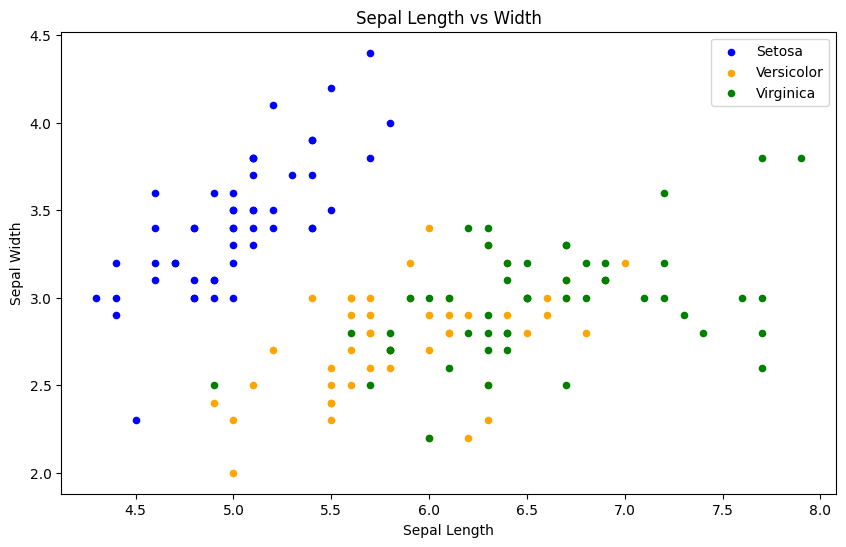

In [ ]:
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='Setosa',  figsize= (10,6))
iris[iris.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
plt.show()

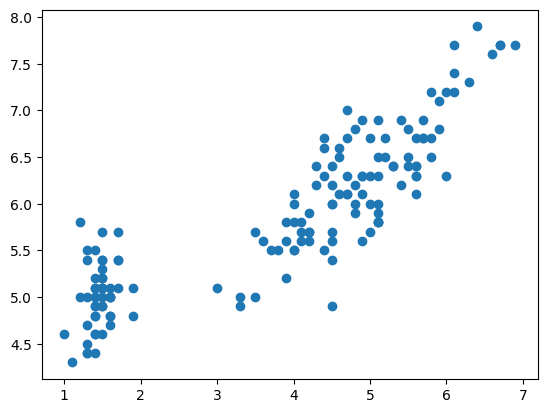

In [ ]:
plt.scatter(x='petal_length',y='sepal_length',data=iris)

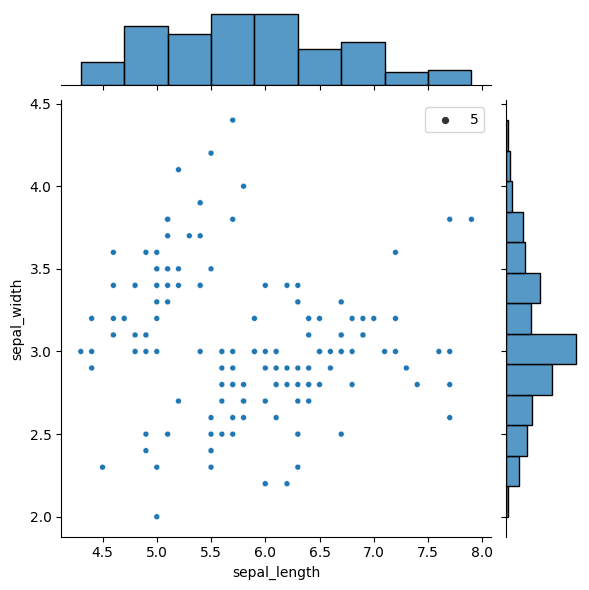

In [ ]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)
plt.show()

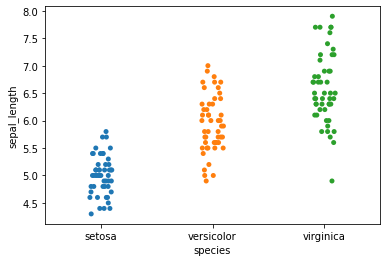

In [ ]:
# Sepal Length using a Strip plot
sns.stripplot(y ='sepal_length', x = 'species', data =iris)
plt.show()

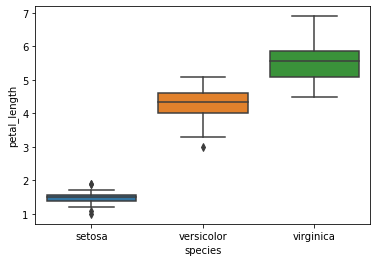

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris)
plt.show()

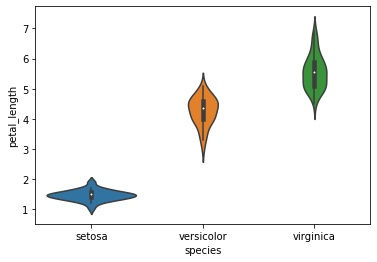

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris)
plt.show()

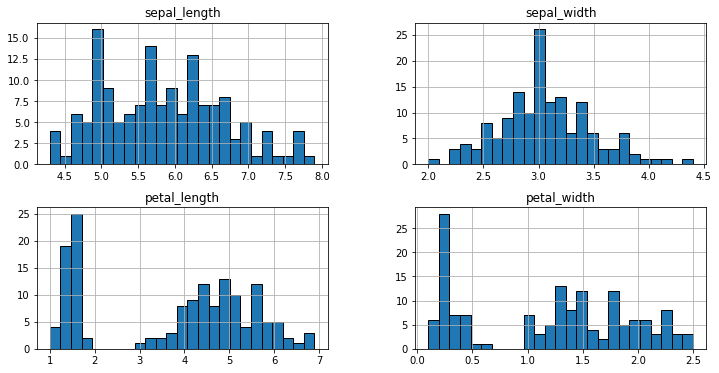

In [ ]:
# Let's see how are the length and width are distributed
iris.hist(edgecolor='black',bins = 25, figsize= (12,6))
plt.show()

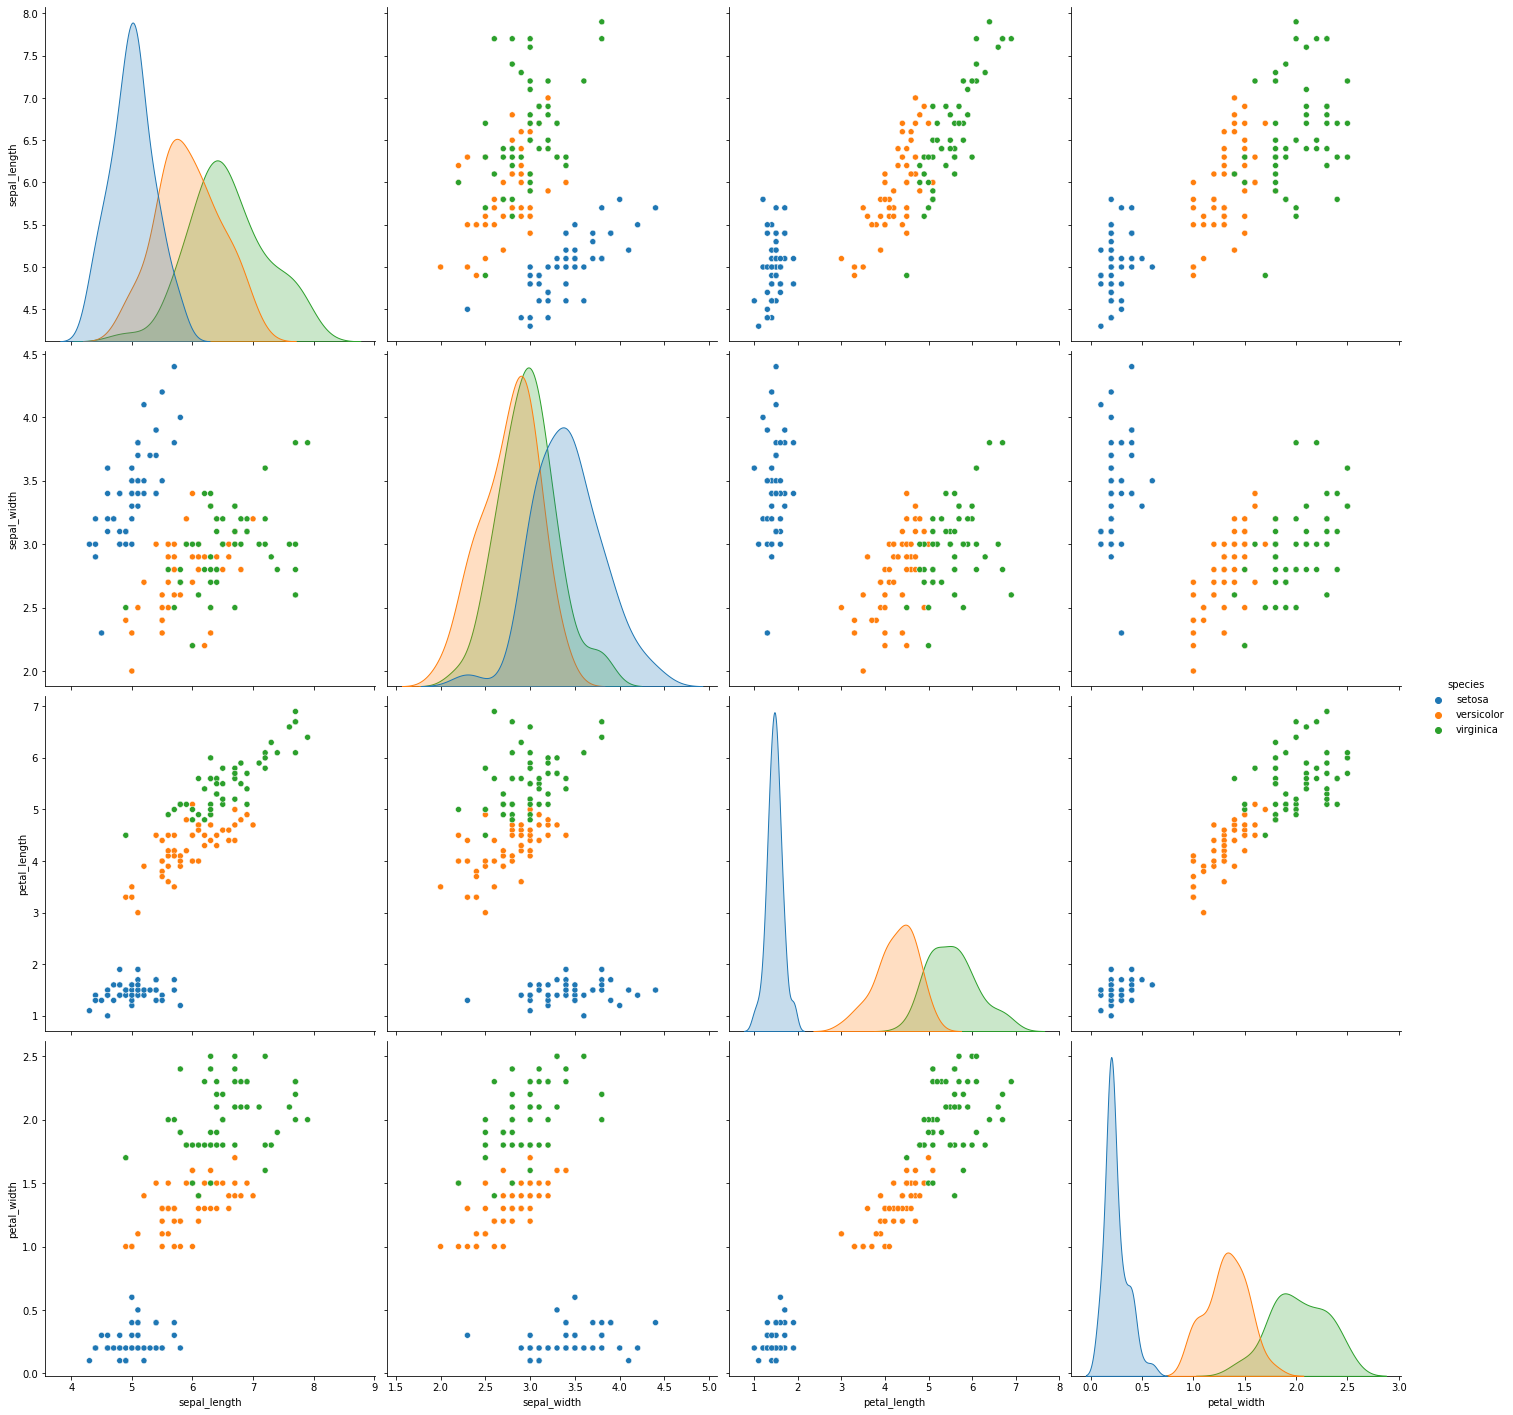

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features

# From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

sns.pairplot(data = iris, hue="species", size=5)
plt.show()

#### Heat Map is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

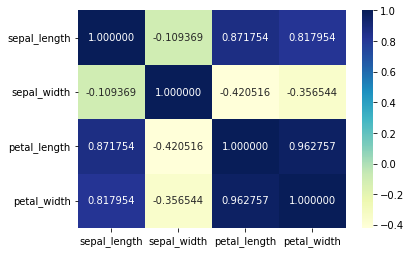

In [ ]:
sns.heatmap(iris.corr(), cmap="YlGnBu", annot=True)
plt.show()

### There is a high corelation between: Sepal Length & Petal Length, Sepal Length & Petal Width, and Petal Length & Petal Width.

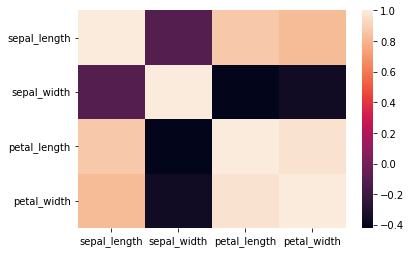

In [ ]:
sns.heatmap(iris.corr(), annot=False)
plt.show()

### Statistical Exploratory Data Analysis

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# Filtering by species
indices = iris['species'] == 'setosa'
setosa = iris.loc[indices,:]
indices = iris['species'] == 'versicolor'
versicolor = iris.loc[indices,:]
indices = iris['species'] == 'virginica'
virginica = iris.loc[indices,:]

# Delete the species column from each dataframe as same species are present

del setosa['species'], versicolor['species'], virginica['species']

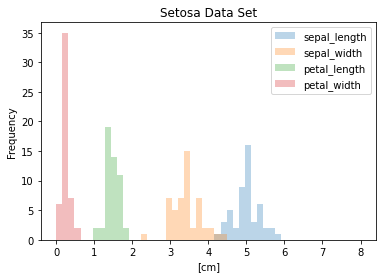

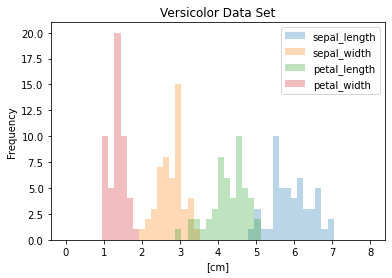

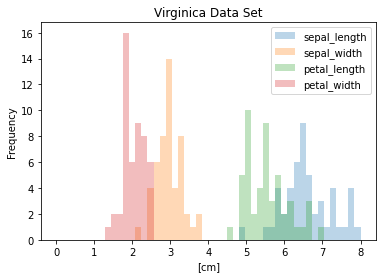

In [ ]:
# Visual EDA for individual species

setosa.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Setosa Data Set')
plt.xlabel('[cm]')

versicolor.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Versicolor Data Set')
plt.xlabel('[cm]')

virginica.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Virginica Data Set')
plt.xlabel('[cm]')

plt.show()

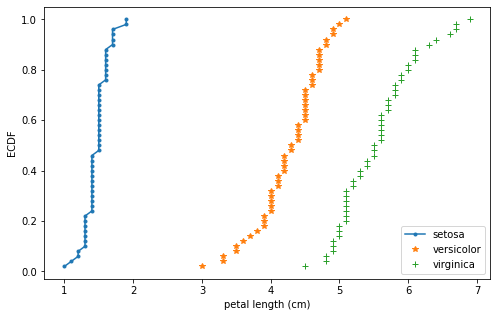

In [ ]:
# ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

# Comparing ECDFs
x_set, y_set = ecdf(setosa['petal_length'])
x_vers, y_vers = ecdf(versicolor['petal_length'])
x_virg, y_virg = ecdf(virginica['petal_length'])


# Plot all ECDFs on the same plot
_ = plt.figure( figsize= (8,5))
_ = plt.plot(x_set, y_set, marker = '.')
_ = plt.plot(x_vers, y_vers, marker = '*', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '+', linestyle = 'none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [ ]:
iris['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [ ]:
iris.isnull().sum() #check missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data = iris.drop_duplicates(subset ="species",)
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [ ]:
iris.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<AxesSubplot:xlabel='sepal_width'>

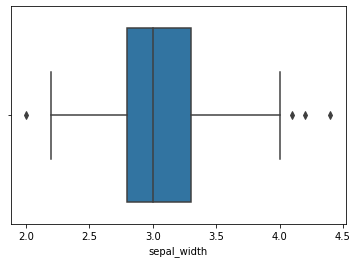

In [ ]:
sns.boxplot(x='sepal_width', data=iris)  #above 4 and below 2 are outliers

#### removing outliers

Old Shape:  (150, 5)
New Shape:  (146, 5)


<AxesSubplot:xlabel='sepal_width'>

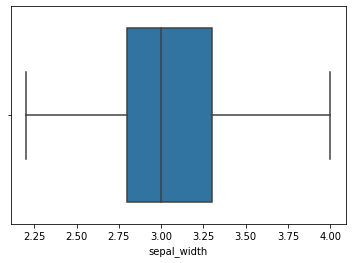

In [ ]:

# IQR
Q1 = np.percentile(iris['sepal_width'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(iris['sepal_width'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", iris.shape)

# Upper bound
upper = np.where(iris['sepal_width'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(iris['sepal_width'] <= (Q1-1.5*IQR))

# Removing the Outliers
iris.drop(upper[0], inplace = True)
iris.drop(lower[0], inplace = True)

print("New Shape: ", iris.shape)

sns.boxplot(x='sepal_width', data=iris)
